## Importing in Mnist data set


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import ing the data
- will get the images form the Mnist Data set form the keras library

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train.shape

(60000, 28, 28)

## Visual of the data
- Will take one imge form the data set to visualize 
- we can see that the image is of the numnber 5

In [9]:
sample_image = x_train[0]

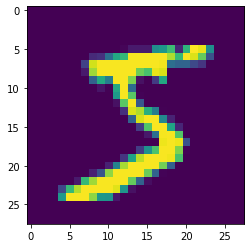

In [10]:
plt.imshow(sample_image)

### ONe hot encoding for the labels
- first value is 5 so the above is corect 
- The labels are just the numbers they represent. if we passed these into the network the network would consier them a continous value and would try to predit 5.5 5.4 etc.. So we will need to ise one hot encoding to fix this issues so oir network rememners this is a classification problem

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_example = to_categorical(y_train)

In [15]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test, num_classes= 10)

In [22]:
y_cat_test.shape


(10000, 10)

In [23]:
y_cat_train  = to_categorical(y_train, num_classes=10)

In [25]:
y_cat_train.shape

(60000, 10)

### Normalizing the training data
- data i just image data
- values go from 0 40 255 
- min is 0 
- to make sure we do not run in to any gradient problems, we should scale this between 0 and 1
- we could use the min max scalar 
- Fit to the traning data and traisform on the testing data becase we do not want to assume prior knowledge of the test data 
- Images are a special case becase these are images and will always be betweene 0 and 255 so we can scale to the max

In [26]:
x_train = x_train/255 

In [27]:
x_test = x_test/255

## now lets look at a scaled image
- image now goes betweeen 0 and 1
- we se the image is still 5 

In [28]:
scaled_image = x_train[0]

In [30]:
scaled_image.shape

(28, 28)

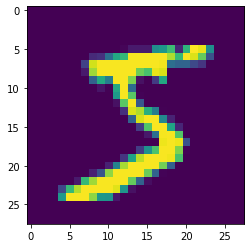

In [33]:
plt.imshow(scaled_image)

## Dimentionality 
- We need to let oue model know the demenson has a value of 1 to indicate a black and white
- Batch size, width, height, color channels

In [35]:
x_train = x_train.reshape(60000,28,28,1)

In [36]:
x_test = x_test.reshape(10000, 28,28,1)

### Creating and training the model
- Filters - Values are choses off the input data -> typical is more conmplex the, sizes, variery, So comonly use powers of 2 -> 32 -> if there is complex images increase size such as shaeps
- kernal _size = 2X2, 4X4 -> goo startinf is 4x4
- Sride -> how big of a stride are we taking as we move across the kernals 28X28, larger images you may want to increase the stride size
- Padding - > Same and Valid(np padding- all demension but -> input image fully get covered by the filter and stride 27/4 us 7 and the stride is 1 so it will be even): Same -> Adds padding so that the input image gets fully covered by the filter and stride
- Flatten= Takes the dementions and multiply them 28 * 28 
- Dense - > should be in between the flatten demention so 28*28 
- Output layer shouldhve the same anout of neurons as class 10 neurons

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [40]:
model  = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4), padding = "valid", 
                 input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## EarlyStopping
- Will use to prevent overfitting 

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=3)

### Fitting the model

In [43]:
model.fit(x_train, y_cat_train, validation_data=(x_test,y_cat_test), epochs=8, callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.1471 - accuracy: 0.9549 - val_loss: 0.0543 - val_accuracy: 0.9811
Epoch 2/8
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.0478 - accuracy: 0.9857 - val_loss: 0.0397 - val_accuracy: 0.9864
Epoch 3/8
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0443 - val_accuracy: 0.9842
Epoch 4/8
60000/60000 [==============================] - 176s 3ms/sample - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0464 - val_accuracy: 0.9851
Epoch 5/8
60000/60000 [==============================] - 197s 3ms/sample - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0462 - val_accuracy: 0.9855


## model Performance

In [44]:
metrics = pd.DataFrame(model.history.history)

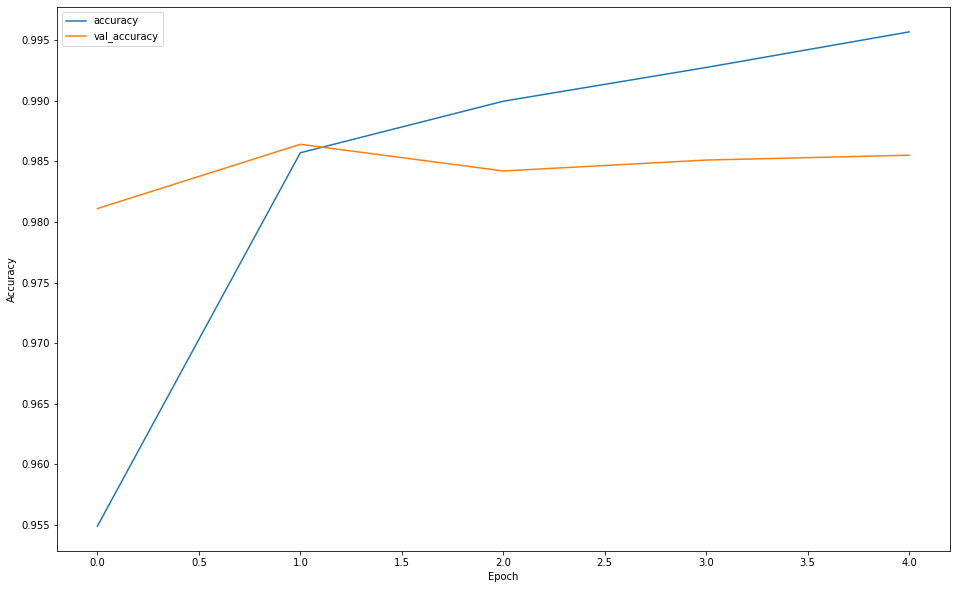

In [92]:
metrics[["accuracy", "val_accuracy"]].plot(figsize = (16,10))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig("Model_Accuracy_Plot")

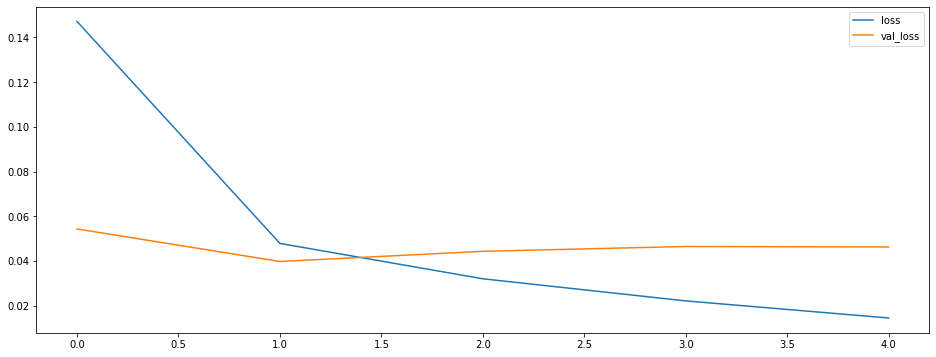

In [50]:
metrics[["loss", "val_loss"]].plot(figsize = (16,6 ))

In [53]:
model.evaluate(x_test, y_cat_test, verbose = 0)

[0.046220704550514344, 0.9855]

## Mettics
= Classificaiton report and Confusion

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
predictions = model.predict_classes(x_test)

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [57]:
print(confusion_matrix(y_test, predictions))

[[ 975    0    0    1    0    0    3    0    1    0]
 [   1 1111    1    5    0    2    9    2    4    0]
 [   1    1 1018    5    0    0    2    3    2    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    0    6    0  959    0    3    0    0   14]
 [   1    0    1    8    0  880    2    0    0    0]
 [   4    1    0    0    1    2  949    0    1    0]
 [   1    0    9    1    0    0    0 1013    1    3]
 [   2    0    3    3    1    2    1    2  954    6]
 [   0    1    0    5    3    4    0    4    1  991]]


In [58]:
import seaborn as sns

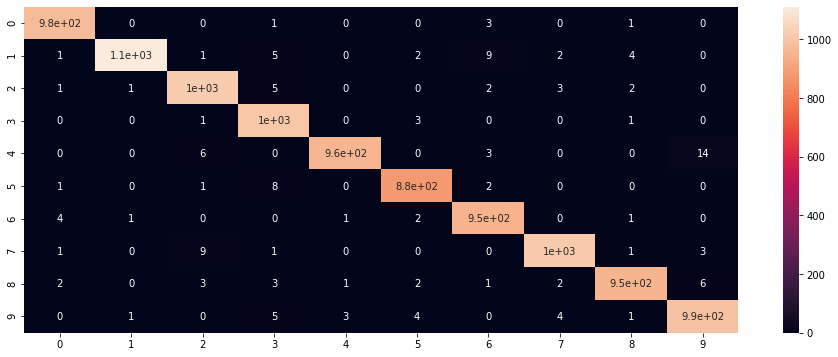

In [61]:
plt.figure(figsize=(16,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### Random Images test 

In [88]:
from random import randint
rand_index = randint(1, len(x_train))
rand_image = x_train[rand_index]

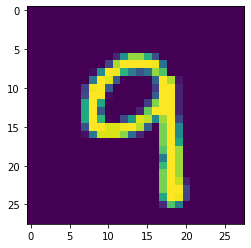

In [89]:
plt.imshow(rand_image.reshape(28,28))

#### True value

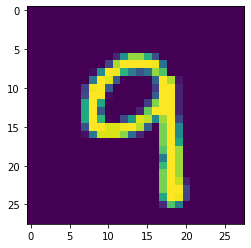

In [90]:
plt.imshow(x_train[rand_index].reshape(28,28))